In [4]:
# Data load

In [1]:
import pandas as pd

train_df = pd.read_csv("train_clean.csv")
val_df = pd.read_csv("val_clean.csv")

train_df.head()


,tweet_id,entity,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [5]:
X_train = train_df["clean_text"]
y_train = train_df["sentiment"]

X_test = val_df["clean_text"]
y_test = val_df["sentiment"]


In [8]:

train_df["clean_text"] = train_df["clean_text"].fillna("")
val_df["clean_text"] = val_df["clean_text"].fillna("")


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(train_df["clean_text"])
X_test_vec = vectorizer.transform(val_df["clean_text"])


In [10]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.784
Confusion Matrix:
 [[116  28   5  23]
 [  3 233  12  18]
 [  9  42 195  39]
 [  7  23   7 240]]

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.86      0.67      0.76       172
    Negative       0.71      0.88      0.79       266
     Neutral       0.89      0.68      0.77       285
    Positive       0.75      0.87      0.80       277

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.80      0.78      0.78      1000



In [12]:
samples = [
    "I love this game",
    "This update is horrible",
    "The service is okay"
]

sample_vec = vectorizer.transform(samples)
preds = model.predict(sample_vec)

for s, p in zip(samples, preds):
    print(s, "->", p)


I love this game -> Positive
This update is horrible -> Negative
The service is okay -> Neutral


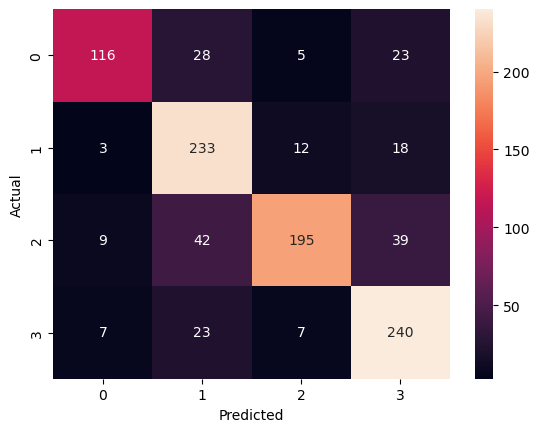

              precision    recall  f1-score   support

  Irrelevant       0.86      0.67      0.76       172
    Negative       0.71      0.88      0.79       266
     Neutral       0.89      0.68      0.77       285
    Positive       0.75      0.87      0.80       277

    accuracy                           0.78      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.80      0.78      0.78      1000



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


In [14]:
samples = [
    "I love this game so much",
    "This is the worst update ever",
    "The service was okay, nothing special"
]

sample_vec = vectorizer.transform(samples)
predictions = model.predict(sample_vec)

for s, p in zip(samples, predictions):
    print(s, "->", p)


I love this game so much -> Positive
This is the worst update ever -> Negative
The service was okay, nothing special -> Neutral
